In [5]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")
using DecisionTree, ScikitLearn.CrossValidation, DataFrames, CSV

   Resolving package versions...
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jones\.julia\environments\v1.10\Manifest.toml`


In [6]:
train_df = CSV.read("data/train.csv", DataFrame)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [7]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [8]:
train_df = dropmissing(train_df, "Embarked")
train_df.Age = replace(train_df.Age,missing=>28)
train_df = select(train_df, Not("Cabin"))

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,Int64,String,String7,Float64,Int64,Int64,String31,Float64,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [9]:
train_df = select(train_df,Not(["PassengerId","Name"]))

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,String7,Float64,Int64,Int64,String31,Float64,String1
1,0,3,male,22.0,1,0,A/5 21171,7.25,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
4,1,1,female,35.0,1,0,113803,53.1,S
5,0,3,male,35.0,0,0,373450,8.05,S
6,0,3,male,28.0,0,0,330877,8.4583,Q
7,0,1,male,54.0,0,0,17463,51.8625,S
8,0,3,male,2.0,3,1,349909,21.075,S
9,1,3,female,27.0,0,2,347742,11.1333,S


In [10]:
combine(groupby(train_df,"Embarked"),nrow=>"count")

Row,Embarked,count
,String1,Int64
1,S,644
2,C,168
3,Q,77


In [11]:
train_df.Embarked = Int64.(replace(train_df.Embarked, "S" => 1, "C" => 2, "Q" => 3))

889-element Vector{Int64}:
 1
 2
 1
 1
 1
 3
 1
 1
 1
 2
 1
 1
 1
 ⋮
 2
 1
 1
 1
 1
 1
 3
 1
 1
 1
 2
 3

In [12]:
combine(groupby(train_df,"Sex"),nrow=>"count")

Row,Sex,count
,String7,Int64
1,male,577
2,female,312


In [13]:
train_df.Sex = Int64.(replace(train_df.Sex, "female" => 1, "male" => 2))

889-element Vector{Int64}:
 2
 1
 1
 1
 2
 2
 2
 2
 1
 1
 1
 1
 2
 ⋮
 1
 1
 2
 1
 2
 2
 1
 2
 1
 1
 2
 2

In [14]:
train_df = select(train_df, Not("Ticket"))

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Int64
1,0,3,2,22.0,1,0,7.25,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.925,1
4,1,1,1,35.0,1,0,53.1,1
5,0,3,2,35.0,0,0,8.05,1
6,0,3,2,28.0,0,0,8.4583,3
7,0,1,2,54.0,0,0,51.8625,1
8,0,3,2,2.0,3,1,21.075,1
9,1,3,1,27.0,0,2,11.1333,1


In [15]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Survived,0.382452,0,0.0,1,0,Int64
2,Pclass,2.31159,1,3.0,3,0,Int64
3,Sex,1.64904,1,2.0,2,0,Int64
4,Age,29.3152,0.42,28.0,80.0,0,Float64
5,SibSp,0.524184,0,0.0,8,0,Int64
6,Parch,0.382452,0,0.0,6,0,Int64
7,Fare,32.0967,0.0,14.4542,512.329,0,Float64
8,Embarked,1.3622,1,1.0,3,0,Int64


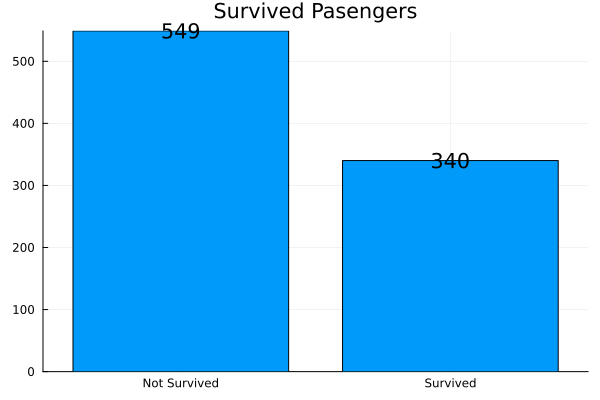

In [16]:
using Plots 

survived = combine(groupby(train_df,"Survived"), nrow => "Count")

plot(survived.Survived, survived.Count, title= "Survived Pasengers",label=nothing, seriestype="bar", texts=survived.Count)
xticks!([0:1:1;],["Not Survived","Survived"])

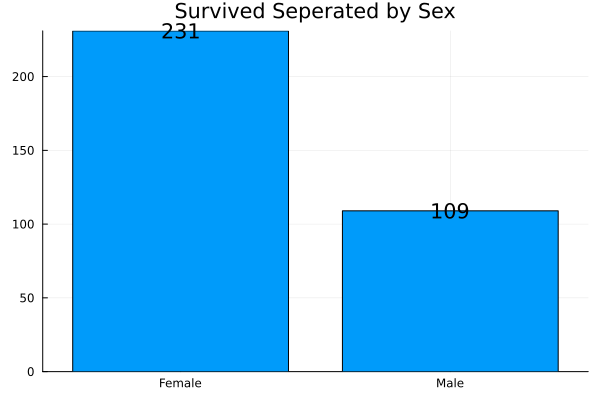

In [17]:
#Seperating survived by sex

survived_by_sex = combine(groupby(train_df[train_df.Survived .== 1,:],"Sex"), nrow => "Count")
plot(survived_by_sex.Sex, survived_by_sex.Count, title="Survived Seperated by Sex", label=nothing, seriestype="bar", texts=survived_by_sex.Count)
xticks!([1:1:2;],["Female","Male"])

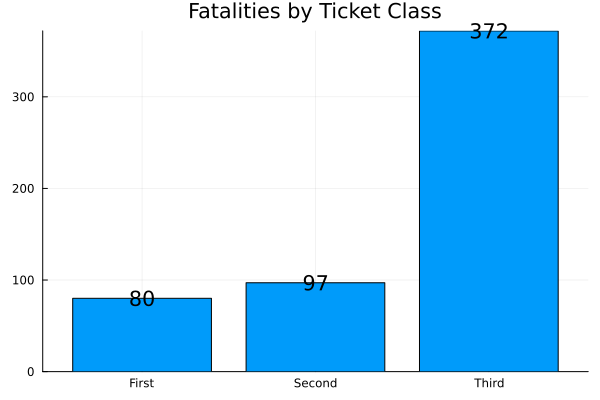

In [18]:
# Seperating by ticket class

pclass_death = combine(groupby(train_df[train_df.Survived .== 0, :], "Pclass"), nrow => "Count")

plot(pclass_death.Pclass, pclass_death.Count, title="Fatalities by Ticket Class", label=nothing, seriestype="bar", texts=pclass_death.Count)
xticks!([1:1:3;],["First","Second","Third"])


In [19]:
# Splitting training set for features and labels 
y = train_df[:,"Survived"]
X = Matrix(train_df[:,Not(["Survived"])])

model = RandomForestClassifier(n_trees=100)

fit!(model,X,y)
accuracy = minimum(cross_val_score(model,X,y,cv=5))

0.7808988764044944